In [27]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

In [28]:
X,Y =make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2, n_clusters_per_class=1, 
random_state=41,hypercube=False,class_sep=30)


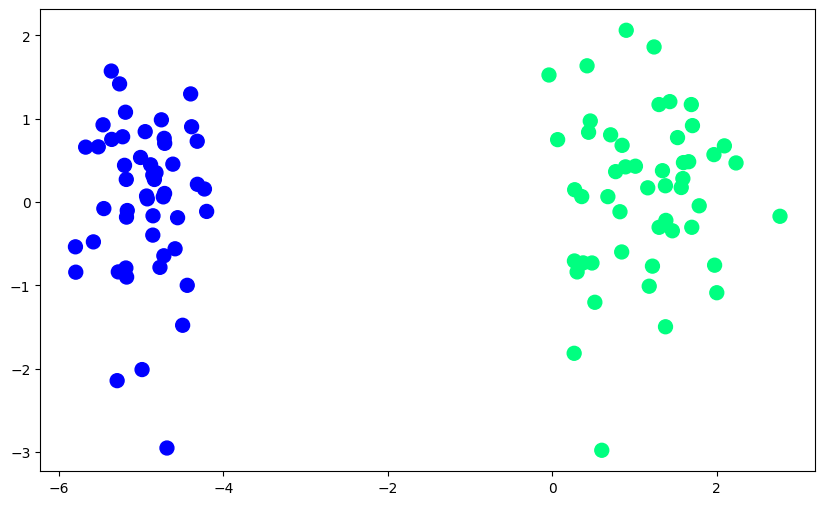

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=Y,cmap='winter',s=100)

Perceptron with Step function

In [30]:
def perceptron(X,Y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(Y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

In [31]:
def step(z):
    return 1 if z>0 else 0

# function call    
intercept_,coef_ = perceptron(X,Y)

print(coef_)
print(intercept_)

[1.1204053  0.40381514]
1.2000000000000002


In [32]:
m = -(coef_[0]/coef_[1])  #m=-a/b
b = -(intercept_/coef_[1])  # b= -c/b

In [33]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

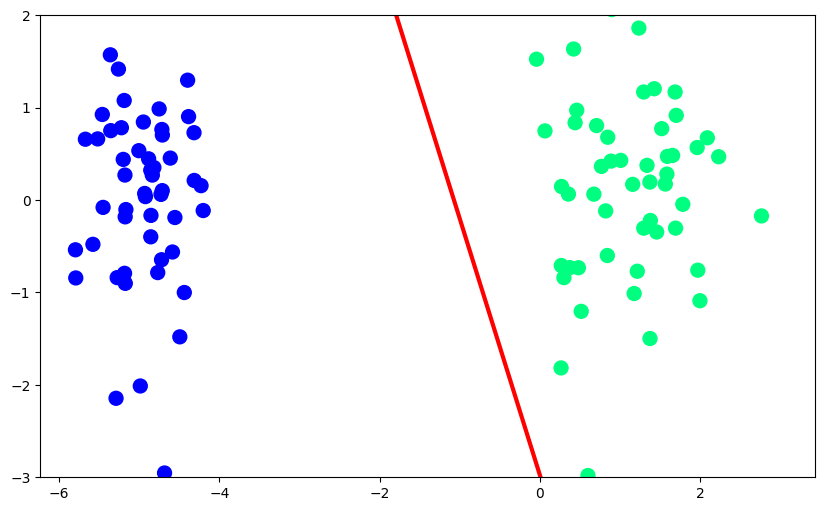

In [34]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=Y,cmap='winter',s=100)
plt.ylim(-3,2)

In [35]:
def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [36]:
m,b = perceptron(X,Y)

In [37]:
# pip install ipympl

In [38]:
# pip install --upgrade pip

In [39]:
# pip install PyQt5

In [40]:
%matplotlib inline
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [41]:
import matplotlib
print(matplotlib.rcsetup.interactive_bk)

['GTK3Agg', 'GTK3Cairo', 'GTK4Agg', 'GTK4Cairo', 'MacOSX', 'nbAgg', 'QtAgg', 'QtCairo', 'Qt5Agg', 'Qt5Cairo', 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo']


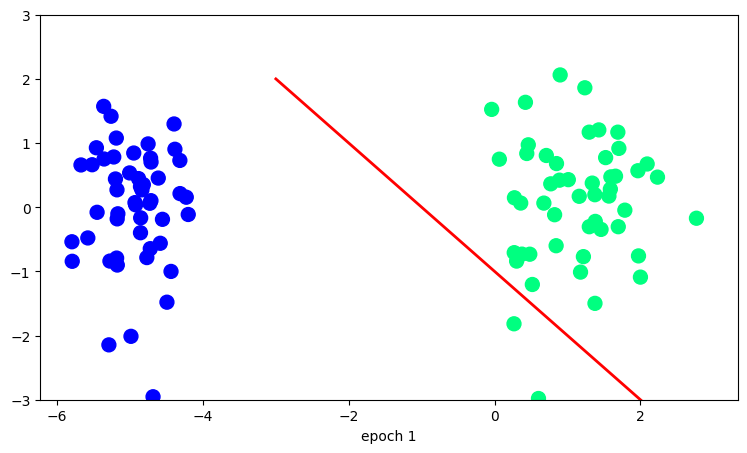

In [42]:
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=Y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)


In [43]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,Y)

LogisticRegression()

In [44]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [45]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

(-3.0, 2.0)

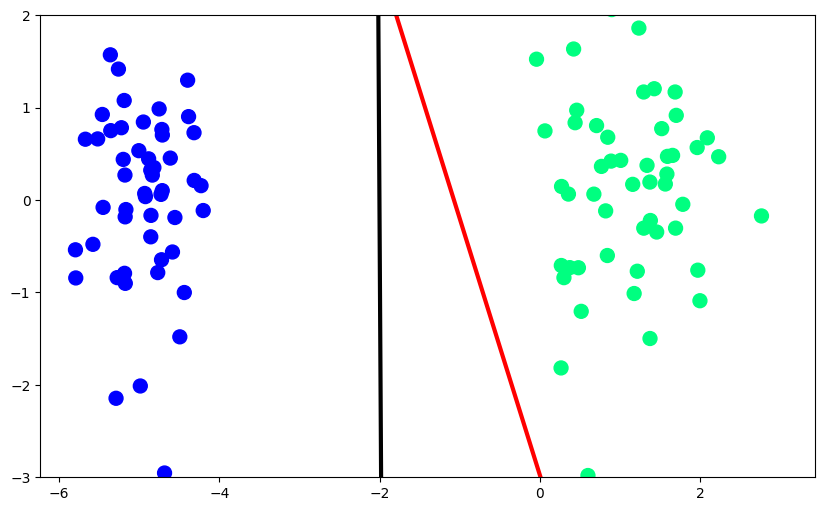

In [46]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=Y,cmap='winter',s=100)
plt.ylim(-3,2)

Perceptron trick with Sigmoid function

In [47]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

In [48]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [49]:
intercept_,coef_ = perceptron(X,Y)

In [50]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [51]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input + b

(-3.0, 2.0)

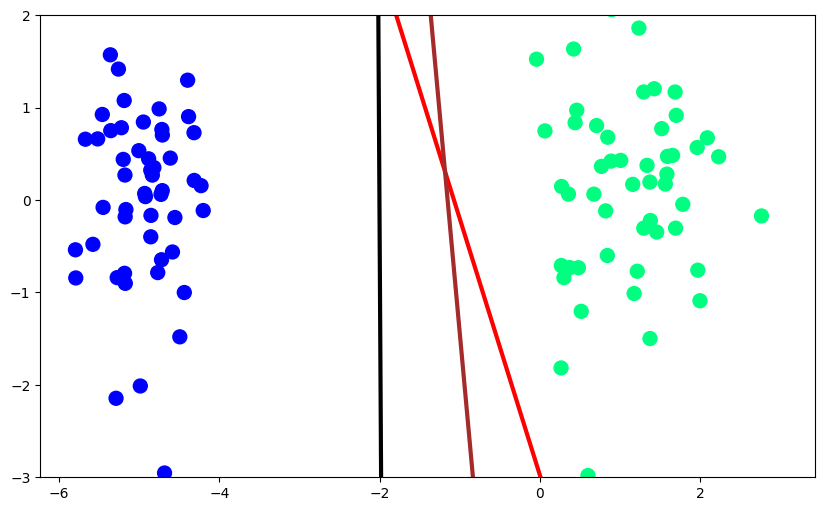

In [52]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.plot(x_input2,y_input2,color='brown',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=Y,cmap='winter',s=100)
plt.ylim(-3,2)

1. Red line -use of step function 
2. Brown line - use of Sigmoid function 
3. Black line - original scikit learn logistic regression

Gradient Descent

In [ ]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)
import matplotlib.pyplot as plt


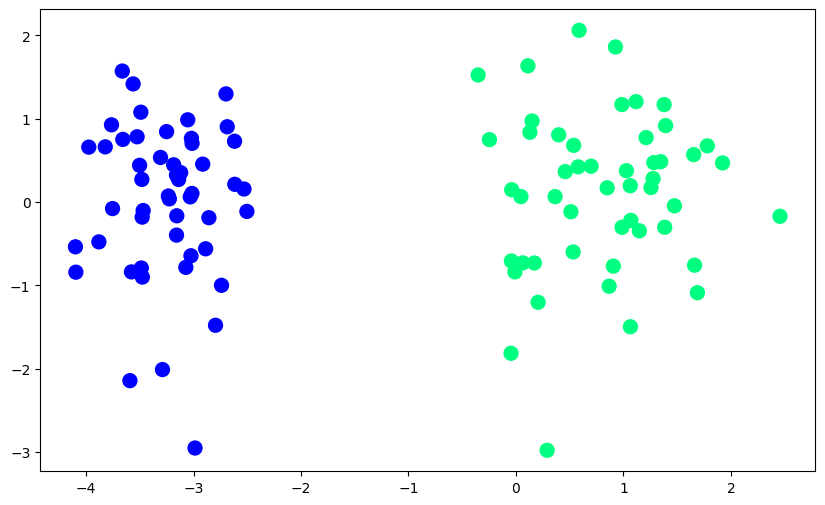

In [2]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [4]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty='none',solver='sag')
lor.fit(X,y)

d:\ineuron\ineuron_class\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
d:\ineuron\ineuron_class\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [5]:
print(lor.coef_)
print(lor.intercept_)

[[4.82977535 0.21785766]]
[5.80496031]


In [6]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

In [7]:
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

In [8]:
def gd(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    
    for i in range(5000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])
        
    return weights[1:],weights[0]

In [9]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [11]:
coef_,intercept_ = gd(X,y)
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b


(-3.0, 2.0)

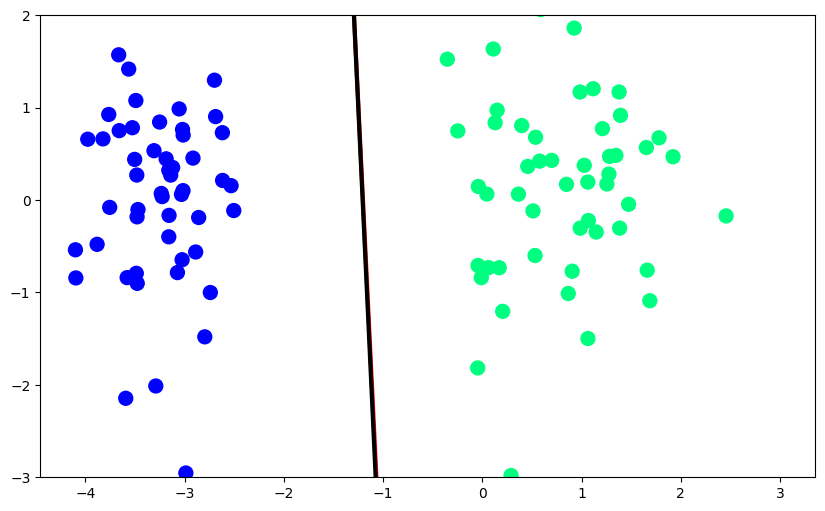

In [12]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)